In [21]:
import sys
sys.path.insert(0, r"C:\users\pairwin\Documents\Github\HelperPI")
#sys.path.insert(0, r'/home/pirwin/Git/HelperPI')
import itertools
import HelperPI
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as sts
import numpy as np
import math
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from scipy import interp
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoLars, HuberRegressor
from sklearn.kernel_ridge import KernelRidge


%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (11,8)

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999


In [2]:
helper = HelperPI.Helper()

INFO:root:Initializing...


In [3]:
sql = helper.getSQL(path=r'C:\Users\pairwin\Documents\GitHub\IPy_Notebooks\SQL\Contest_Sql.sql')
base, dtypedf = helper.readData(sql)

INFO:root:Reading data...
INFO:root:Data read complete...
INFO:root:Read: 175000 rows.


                           Count Column Type
0                      LAST_NAME      object
1                 ADDRESS_LINE_1      object
2                 ADDRESS_LINE_2      object
3                      CITY_NAME      object
4                     STATE_CODE      object
5                   COUNTRY_CODE      object
6                            ZIP      object
7                        ZIP_EXT      object
8                      SALES_R12     float64
9                      SALES_R24     float64
10                     SALES_R48     float64
11                     SALES_RLT     float64
12       FISHING_MARINE_SALES_LT     float64
13  CAMPING_WATERSPORTS_SALES_LT     float64
14    HUNTING_HUNTCLOTH_SALES_LT     float64
15             FOOTWEAR_SALES_LT     float64
16             SHOOTING_SALES_LT     float64
17                 GIFT_SALES_LT     float64
18              APPAREL_SALES_LT     float64
19                OTHER_SALES_LT     float64
20                     VISITS_LT     float64
21        

In [4]:
base.describe()

,SALES_R12,SALES_R24,SALES_R48,SALES_RLT,FISHING_MARINE_SALES_LT,CAMPING_WATERSPORTS_SALES_LT,HUNTING_HUNTCLOTH_SALES_LT,FOOTWEAR_SALES_LT,SHOOTING_SALES_LT,GIFT_SALES_LT,APPAREL_SALES_LT,OTHER_SALES_LT,VISITS_LT,FISH_MARINE_PERC,CAMPING_WATERSPORTS_PERC,HUNTING_PERC,FOOTWEAR_PERC,SHOOTING_PERC,GIFT_PERC,APPAREL_PERC,OTHER_PERC,DAYS_SINCE_PURCHASE,DAYS_AS_CUSTOMER,REWARDS_CUSTOMER,YOY_TREND,SALES_TARGET_N12
count,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,174956.000000,174956.000000,174956.000000,174956.000000,174956.000000,174956.000000,174956.000000,174956.000000,174956.000000,174956.000000,175000.000000,175000.000000,175000.000000
mean,87.705929,174.827474,352.011250,693.091289,195.653371,63.331725,140.296999,48.294692,102.635816,31.723069,99.959949,11.195667,6.950926,0.210355,0.104740,0.153749,0.082490,0.108641,0.114930,0.205074,0.020021,947.289261,1984.022971,0.387903,0.096019,59.743823
std,376.183258,591.083059,1125.553437,2378.951663,1106.474421,226.416899,682.798466,157.841935,1012.293701,116.305112,304.848227,59.224697,18.627511,0.329518,0.231611,0.273533,0.203726,0.248863,0.251400,0.308899,0.102297,424.093249,1209.309848,0.487274,5.805461,271.686498
min,0.000000,0.000000,0.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,365.000000,365.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,35.840000,47.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,572.000000,1026.000000,0.000000,-0.925335,0.000000
50%,0.000000,31.920000,96.195000,146.675000,0.000000,0.000000,0.000000,0.000000,0.000000,1.690000,9.990000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005064,0.025604,0.000000,868.000000,1591.000000,0.000000,0.000000,0.000000
75%,57.930000,139.040000,284.740000,514.601750,76.372500,32.980000,58.980000,29.950000,21.990000,20.430000,79.930000,0.000000,6.000000,0.329037,0.078562,0.194415,0.047100,0.048565,0.080202,0.298735,0.000000,1291.000000,2988.000000,1.000000,0.000000,0.000000
max,91598.760000,125819.340000,266698.610000,393314.520000,230946.360000,25620.000000,151264.620000,23006.860000,341498.920000,10225.700000,18303.570000,3739.230000,1186.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4063.000000,4314.000000,1.000000,1197.200000,34366.190000


In [5]:
collist = ['SALES_R12','SALES_R24','SALES_R48','SALES_RLT','FISHING_MARINE_SALES_LT','CAMPING_WATERSPORTS_SALES_LT',
         'HUNTING_HUNTCLOTH_SALES_LT','FOOTWEAR_SALES_LT','SHOOTING_SALES_LT','GIFT_SALES_LT','APPAREL_SALES_LT',
         'OTHER_SALES_LT','VISITS_LT','FISH_MARINE_PERC','CAMPING_WATERSPORTS_PERC','HUNTING_PERC','FOOTWEAR_PERC',
         'SHOOTING_PERC','GIFT_PERC','APPAREL_PERC','OTHER_PERC','DAYS_SINCE_PURCHASE','DAYS_AS_CUSTOMER','REWARDS_CUSTOMER',
         'YOY_TREND','SALES_TARGET_N12']
collist_X = ['SALES_R12','SALES_R24','SALES_R48','SALES_RLT','FISHING_MARINE_SALES_LT','CAMPING_WATERSPORTS_SALES_LT',
         'HUNTING_HUNTCLOTH_SALES_LT','FOOTWEAR_SALES_LT','SHOOTING_SALES_LT','GIFT_SALES_LT','APPAREL_SALES_LT',
         'OTHER_SALES_LT','VISITS_LT','FISH_MARINE_PERC','CAMPING_WATERSPORTS_PERC','HUNTING_PERC','FOOTWEAR_PERC',
         'SHOOTING_PERC','GIFT_PERC','APPAREL_PERC','OTHER_PERC','DAYS_SINCE_PURCHASE','DAYS_AS_CUSTOMER','REWARDS_CUSTOMER',
         'YOY_TREND']
collist_y = ['SALES_TARGET_N12']


In [6]:
train, test = helper.splitData(base[collist], .75)

train, val = helper.splitData(train, 0.5)

print(train.shape, val.shape, test.shape)

train_X = train[collist_X]

train_y = train[collist_y].as_matrix().ravel()
val_X = val[collist_X]
val_y = val[collist_y].as_matrix().ravel()
test_X = test[collist_X]
test_y = test[collist_y].as_matrix().ravel()

for var in collist_X:
    name = var + '_sqrt'
    train_X[name] = np.sqrt(train_X[var])
    val_X[name] = np.sqrt(val_X[var])
    test_X[name] = np.sqrt(test_X[var])
    name = var + '_cbrt'
    train_X[name] = np.cbrt(train_X[var])
    val_X[name] = np.cbrt(val_X[var])
    test_X[name] = np.cbrt(test_X[var])
    name = var + '_log'
    train_X[name] = np.log(train_X[var]+1)
    val_X[name] = np.log(val_X[var]+1)
    test_X[name] = np.log(test_X[var]+1)
    
    
collist_X_expanded = train_X.columns


(65625, 26) (65625, 26) (43750, 26)
Index(['SALES_R12', 'SALES_R24', 'SALES_R48', 'SALES_RLT',
       'FISHING_MARINE_SALES_LT', 'CAMPING_WATERSPORTS_SALES_LT',
       'HUNTING_HUNTCLOTH_SALES_LT', 'FOOTWEAR_SALES_LT', 'SHOOTING_SALES_LT',
       'GIFT_SALES_LT', 'APPAREL_SALES_LT', 'OTHER_SALES_LT', 'VISITS_LT',
       'FISH_MARINE_PERC', 'CAMPING_WATERSPORTS_PERC', 'HUNTING_PERC',
       'FOOTWEAR_PERC', 'SHOOTING_PERC', 'GIFT_PERC', 'APPAREL_PERC',
       'OTHER_PERC', 'DAYS_SINCE_PURCHASE', 'DAYS_AS_CUSTOMER',
       'REWARDS_CUSTOMER', 'YOY_TREND', 'SALES_R12_sqrt', 'SALES_R12_cbrt',
       'SALES_R12_log', 'SALES_R24_sqrt', 'SALES_R24_cbrt', 'SALES_R24_log',
       'SALES_R48_sqrt', 'SALES_R48_cbrt', 'SALES_R48_log', 'SALES_RLT_sqrt',
       'SALES_RLT_cbrt', 'SALES_RLT_log', 'FISHING_MARINE_SALES_LT_sqrt',
       'FISHING_MARINE_SALES_LT_cbrt', 'FISHING_MARINE_SALES_LT_log',
       'CAMPING_WATERSPORTS_SALES_LT_sqrt',
       'CAMPING_WATERSPORTS_SALES_LT_cbrt', 'CAMPING_WATERSPO

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


In [7]:
missing_df = train_X.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_X.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.01]



,column_name,missing_count,missing_ratio
97,YOY_TREND_sqrt,21737,0.33123


In [8]:
imr = Imputer(missing_values='NaN',strategy='median',axis=0)
imr = imr.fit(train_X)
imputed_data = pd.DataFrame(imr.transform(train_X.values), columns = collist_X_expanded)

# stdsc = MinMaxScaler()
# stdsc.fit(imputed_data)

# train_X = pd.DataFrame(stdsc.transform(imputed_data), columns = collist_X)
train_X = imputed_data

imputed_data = pd.DataFrame(imr.transform(val_X.values), columns = collist_X_expanded)
#val_X = pd.DataFrame(stdsc.transform(imputed_data), columns = collist_X)
val_X = imputed_data
imputed_data = pd.DataFrame(imr.transform(test_X.values), columns = collist_X_expanded)
#test_X = pd.DataFrame(stdsc.transform(imputed_data), columns = collist_X)
test_X = imputed_data


In [9]:
matplotlib.rcParams['figure.figsize'] = (5,2)


collist_X_expanded = sorted(collist_X_expanded, key=str.lower)

for var in collist_X_expanded: 
    vardf = train_X[var]
    #print(vardf.head())
    coef, pval = stats.pearsonr(vardf.as_matrix(), train_y)
    print('%50s Corr Coef: %7s - pval:  %.4f' % (var, str(round(coef,2)), pval))
    #plt.hist(train_X[var], bins = 100)
    #plt.show()
    
matplotlib.rcParams['figure.figsize'] = (11,8)

                                      APPAREL_PERC Corr Coef:   -0.04 - pval:  0.0000
                                 APPAREL_PERC_cbrt Corr Coef:    0.04 - pval:  0.0000
                                  APPAREL_PERC_log Corr Coef:   -0.03 - pval:  0.0000
                                 APPAREL_PERC_sqrt Corr Coef:    0.01 - pval:  0.0024
                                  APPAREL_SALES_LT Corr Coef:     0.3 - pval:  0.0000
                             APPAREL_SALES_LT_cbrt Corr Coef:    0.26 - pval:  0.0000
                              APPAREL_SALES_LT_log Corr Coef:    0.21 - pval:  0.0000
                             APPAREL_SALES_LT_sqrt Corr Coef:     0.3 - pval:  0.0000
                          CAMPING_WATERSPORTS_PERC Corr Coef:   -0.01 - pval:  0.0002
                     CAMPING_WATERSPORTS_PERC_cbrt Corr Coef:    0.08 - pval:  0.0000
                      CAMPING_WATERSPORTS_PERC_log Corr Coef:    -0.0 - pval:  0.2091
                     CAMPING_WATERSPORTS_PERC_sqrt Cor

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3018: RuntimeWarning: invalid value encountered in subtract
  xm, ym = x - mx, y - my
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [10]:
train_X.head()

,SALES_R12,SALES_R24,SALES_R48,SALES_RLT,FISHING_MARINE_SALES_LT,CAMPING_WATERSPORTS_SALES_LT,HUNTING_HUNTCLOTH_SALES_LT,FOOTWEAR_SALES_LT,SHOOTING_SALES_LT,GIFT_SALES_LT,APPAREL_SALES_LT,OTHER_SALES_LT,VISITS_LT,FISH_MARINE_PERC,CAMPING_WATERSPORTS_PERC,HUNTING_PERC,FOOTWEAR_PERC,SHOOTING_PERC,GIFT_PERC,APPAREL_PERC,OTHER_PERC,DAYS_SINCE_PURCHASE,DAYS_AS_CUSTOMER,REWARDS_CUSTOMER,YOY_TREND,SALES_R12_sqrt,SALES_R12_cbrt,SALES_R12_log,SALES_R24_sqrt,SALES_R24_cbrt,SALES_R24_log,SALES_R48_sqrt,SALES_R48_cbrt,SALES_R48_log,SALES_RLT_sqrt,SALES_RLT_cbrt,SALES_RLT_log,FISHING_MARINE_SALES_LT_sqrt,FISHING_MARINE_SALES_LT_cbrt,FISHING_MARINE_SALES_LT_log,CAMPING_WATERSPORTS_SALES_LT_sqrt,CAMPING_WATERSPORTS_SALES_LT_cbrt,CAMPING_WATERSPORTS_SALES_LT_log,HUNTING_HUNTCLOTH_SALES_LT_sqrt,HUNTING_HUNTCLOTH_SALES_LT_cbrt,HUNTING_HUNTCLOTH_SALES_LT_log,FOOTWEAR_SALES_LT_sqrt,FOOTWEAR_SALES_LT_cbrt,FOOTWEAR_SALES_LT_log,SHOOTING_SALES_LT_sqrt,SHOOTING_SALES_LT_cbrt,SHOOTING_SALES_LT_log,GIFT_SALES_LT_sqrt,GIFT_SALES_LT_cbrt,GIFT_SALES_LT_log,APPAREL_SALES_LT_sqrt,APPAREL_SALES_LT_cbrt,APPAREL_SALES_LT_log,OTHER_SALES_LT_sqrt,OTHER_SALES_LT_cbrt,OTHER_SALES_LT_log,VISITS_LT_sqrt,VISITS_LT_cbrt,VISITS_LT_log,FISH_MARINE_PERC_sqrt,FISH_MARINE_PERC_cbrt,FISH_MARINE_PERC_log,CAMPING_WATERSPORTS_PERC_sqrt,CAMPING_WATERSPORTS_PERC_cbrt,CAMPING_WATERSPORTS_PERC_log,HUNTING_PERC_sqrt,HUNTING_PERC_cbrt,HUNTING_PERC_log,FOOTWEAR_PERC_sqrt,FOOTWEAR_PERC_cbrt,FOOTWEAR_PERC_log,SHOOTING_PERC_sqrt,SHOOTING_PERC_cbrt,SHOOTING_PERC_log,GIFT_PERC_sqrt,GIFT_PERC_cbrt,GIFT_PERC_log,APPAREL_PERC_sqrt,APPAREL_PERC_cbrt,APPAREL_PERC_log,OTHER_PERC_sqrt,OTHER_PERC_cbrt,OTHER_PERC_log,DAYS_SINCE_PURCHASE_sqrt,DAYS_SINCE_PURCHASE_cbrt,DAYS_SINCE_PURCHASE_log,DAYS_AS_CUSTOMER_sqrt,DAYS_AS_CUSTOMER_cbrt,DAYS_AS_CUSTOMER_log,REWARDS_CUSTOMER_sqrt,REWARDS_CUSTOMER_cbrt,REWARDS_CUSTOMER_log,YOY_TREND_sqrt,YOY_TREND_cbrt,YOY_TREND_log
0,0.00,0.00,49.94,89.81,0.00,0.0,0.00,49.85,0.0,19.99,19.97,0.0,2.0,0.000000,0.000000,0.000000,0.555061,0.0,0.222581,0.222358,0.000000,1252.0,1948.0,1.0,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,7.066824,3.682557,3.930648,9.476814,4.478249,4.508769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.060453,3.680344,3.928880,0.0,0.0,0.0,4.471018,2.713965,3.044046,4.468781,2.713060,3.043093,0.00000,0.000000,0.000000,1.414214,1.259921,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.745024,0.821827,0.441515,0.0,0.0,0.0,0.471785,0.606033,0.200964,0.471549,0.605830,0.200782,0.000000,0.000000,0.000000,35.383612,10.777916,7.133296,44.136153,12.489057,7.575072,1.0,1.0,0.693147,0.0,0.0,0.0
1,0.00,0.00,203.90,203.90,0.00,44.9,0.00,0.00,0.0,0.00,0.00,159.0,2.0,0.000000,0.220206,0.000000,0.000000,0.0,0.000000,0.000000,0.779794,1679.0,1686.0,0.0,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,14.279356,5.885803,5.322522,14.279356,5.885803,5.322522,0.000000,0.000000,0.000000,6.700746,3.554257,3.826465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.60952,5.417502,5.075174,1.414214,1.259921,1.098612,0.000000,0.000000,0.000000,0.469261,0.603869,0.19902,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.883059,0.920435,0.576498,40.975602,11.885485,7.426549,41.060930,11.901979,7.430707,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.00,0.00,16.97,73.87,3.98,0.0,0.00,0.00,0.0,0.00,69.89,0.0,2.0,0.053878,0.000000,0.000000,0.000000,0.0,0.000000,0.946122,0.000000,1654.0,2110.0,0.0,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,4.119466,2.569768,2.888704,8.594766,4.195877,4.315753,1.994994,1.584751,1.605430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,8.360024,4.119125,4.261129,0.00000,0.000000,0.000000,1.414214,1.259921,1.098612,0.232116,0.377691,0.052477,0.000000,0.

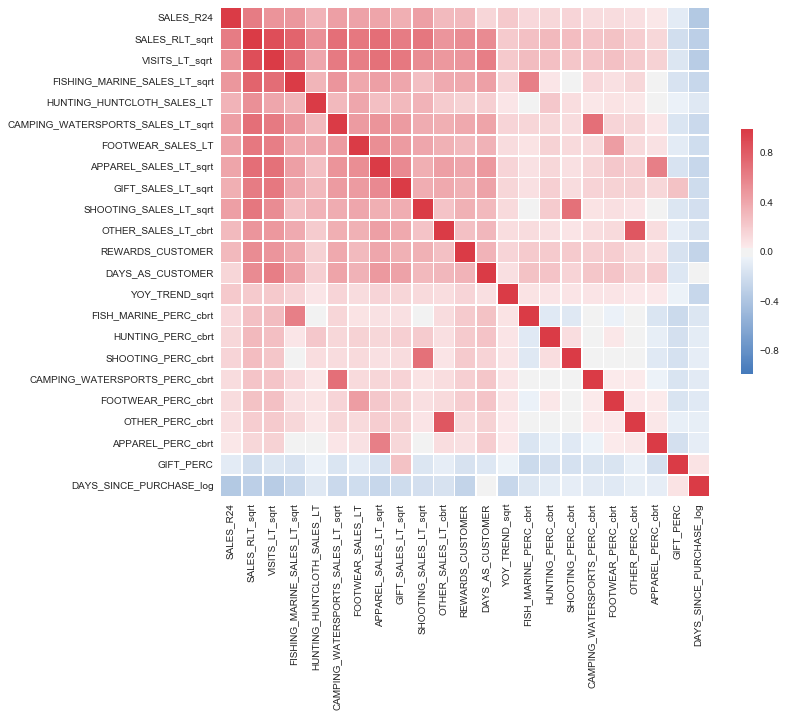

In [11]:
collist_X2 = ['SALES_R24','SALES_RLT_sqrt','VISITS_LT_sqrt','FISHING_MARINE_SALES_LT_sqrt',
              'HUNTING_HUNTCLOTH_SALES_LT','CAMPING_WATERSPORTS_SALES_LT_sqrt','FOOTWEAR_SALES_LT','APPAREL_SALES_LT_sqrt',
              'GIFT_SALES_LT_sqrt','SHOOTING_SALES_LT_sqrt','OTHER_SALES_LT_cbrt','REWARDS_CUSTOMER','DAYS_AS_CUSTOMER',
              'YOY_TREND_sqrt','FISH_MARINE_PERC_cbrt','HUNTING_PERC_cbrt','SHOOTING_PERC_cbrt','CAMPING_WATERSPORTS_PERC_cbrt',
              'FOOTWEAR_PERC_cbrt','OTHER_PERC_cbrt','APPAREL_PERC_cbrt','GIFT_PERC','DAYS_SINCE_PURCHASE_log']

train_X2 = train_X[collist_X2]
    
corr = train_X2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



 1) SALES_R24                      0.389865
 2) DAYS_SINCE_PURCHASE_log        0.076456
 3) SALES_RLT_sqrt                 0.056443
 4) DAYS_AS_CUSTOMER               0.049754
 5) VISITS_LT_sqrt                 0.036792
 6) HUNTING_HUNTCLOTH_SALES_LT     0.031953
 7) FISHING_MARINE_SALES_LT_sqrt   0.026257
 8) FISH_MARINE_PERC_cbrt          0.025356
 9) HUNTING_PERC_cbrt              0.025055
10) CAMPING_WATERSPORTS_PERC_cbrt  0.024673
11) APPAREL_SALES_LT_sqrt          0.024458
12) APPAREL_PERC_cbrt              0.024068
13) GIFT_PERC                      0.023857
14) CAMPING_WATERSPORTS_SALES_LT_sqrt 0.023600
15) GIFT_SALES_LT_sqrt             0.023052
16) FOOTWEAR_PERC_cbrt             0.022793
17) SHOOTING_PERC_cbrt             0.021816
18) YOY_TREND_sqrt                 0.021354
19) SHOOTING_SALES_LT_sqrt         0.021022
20) FOOTWEAR_SALES_LT              0.019002
21) OTHER_PERC_cbrt                0.013811
22) OTHER_SALES_LT_cbrt            0.012901
23) REWARDS_CUSTOMER         

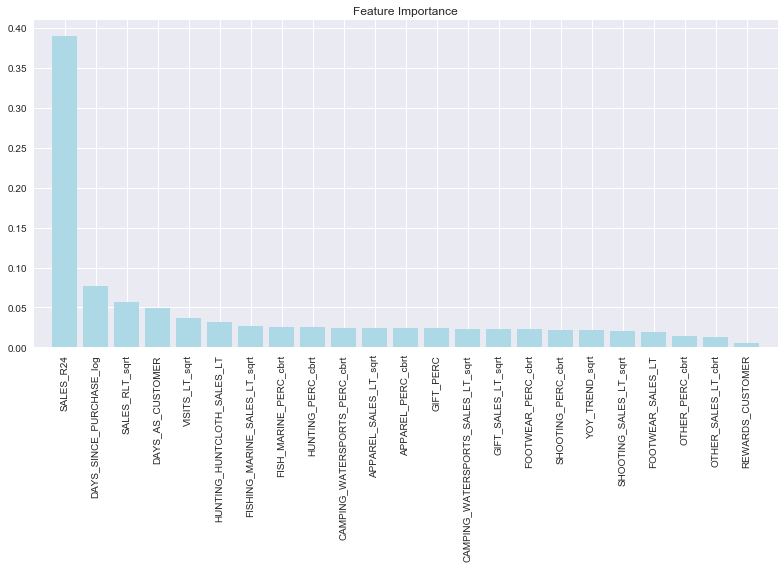

In [12]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = np.asarray(collist_X2)

forests = RandomForestRegressor(n_estimators=300,
                                random_state=0,
                                n_jobs=-1)
forests.fit(train_X2, train_y)
importances = forests.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(train_X2.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]],
                                      importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(train_X2.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(train_X2.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, train_X2.shape[1]])
plt.tight_layout()
plt.show()

In [26]:
from operator import itemgetter
from time import time
from scipy.stats.distributions import uniform

# Utility function to report best scores
def report(grid_scores, n_top=5):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")
        

In [41]:
param_test1 = {
     'max_delta_step': [0,1,2,3,4,5,6],
     'max_depth':list(range(3,12)),
     'min_child_weight':list(range(1,10)),
     'colsample_bytree': uniform(0.1, 0.9),
     'subsample': uniform(0.1, 0.9),
     'reg_alpha': uniform(0.1, 0.9),
     'reg_lambda': uniform(0.1, 0.9)
}

gsearch1 = RandomizedSearchCV(estimator = xgb.XGBRegressor(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_absolute_error',
                              n_jobs=-1,
                              n_iter=1000)
start = time()
gsearch1.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gsearch1.grid_scores_)))
report(gsearch1.grid_scores_)
    

Parameter search took 3092.79 seconds for 1000 candidate parameter settings.
Model with rank: 1
Mean validation score: -61.614 (std: 1.075)
Parameters: {'colsample_bytree': 0.78139994019820591, 'max_delta_step': 1, 'max_depth': 9, 'min_child_weight': 9, 'reg_alpha': 0.11315330531156727, 'reg_lambda': 0.19907760548288311, 'subsample': 0.11772444317079866}

Model with rank: 2
Mean validation score: -61.660 (std: 1.099)
Parameters: {'colsample_bytree': 0.9917933925018857, 'max_delta_step': 1, 'max_depth': 7, 'min_child_weight': 8, 'reg_alpha': 0.57108807257269567, 'reg_lambda': 0.56291920392722705, 'subsample': 0.15930799979039623}

Model with rank: 3
Mean validation score: -61.660 (std: 1.056)
Parameters: {'colsample_bytree': 0.69825485029065271, 'max_delta_step': 1, 'max_depth': 7, 'min_child_weight': 5, 'reg_alpha': 0.21577607660256568, 'reg_lambda': 0.43103441904426643, 'subsample': 0.1280410923106321}

Model with rank: 4
Mean validation score: -61.674 (std: 1.078)
Parameters: {'colsa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [38]:
#Parameters: {'colsample_bytree': 0.61387382694815562, 'max_delta_step': 1, 'max_depth': 9, 
#'min_child_weight': 3, 'reg_alpha': 0.15354530599179927, 'reg_lambda': 0.90791087822894745, 
# 'subsample': 0.1568968548795461}
#max_delta_step = 1
#max_depth = 10
#min_child_weight = 1
#colsample_bytree = 0.7
#subsample = 1.0

tuned_model = xgb.XGBRegressor(learning_rate = 0.01,
                        n_estimators = 1000,
                        max_delta_step = 1,
                        max_depth = 10,
                        min_child_weight = 1,
                        subsample = 0.2,
                        colsample_bytree = 0.7,
                        objective = 'reg:linear',
                        reg_alpha= 0.8,
                        reg_lambda = 0.91,
                        seed = 27)
xgbmodel = tuned_model.fit(train_X2.values, train_y, 
                 eval_set=[(train_X2.values, train_y), (val_X[collist_X2].values, val_y), (test_X[collist_X2].values, test_y)], 
                 eval_metric='mae',
                 early_stopping_rounds=50,                 
                 verbose=True)

#fig, ax = plt.subplots(figsize=(12,18))
#xgb.plot_importance(xgbmodel, height=0.8, ax=ax)
#plt.show()

[0]	validation_0-mae:57.4422	validation_1-mae:61.8877	validation_2-mae:61.1182
Multiple eval metrics have been passed: 'validation_2-mae' will be used for early stopping.

Will train until validation_2-mae hasn't improved in 50 rounds.
[1]	validation_0-mae:57.4479	validation_1-mae:61.8932	validation_2-mae:61.1237
[2]	validation_0-mae:57.4535	validation_1-mae:61.8987	validation_2-mae:61.1292
[3]	validation_0-mae:57.4592	validation_1-mae:61.9042	validation_2-mae:61.1347
[4]	validation_0-mae:57.4648	validation_1-mae:61.9098	validation_2-mae:61.1402
[5]	validation_0-mae:57.4704	validation_1-mae:61.9152	validation_2-mae:61.1457
[6]	validation_0-mae:57.4761	validation_1-mae:61.9208	validation_2-mae:61.1512
[7]	validation_0-mae:57.4817	validation_1-mae:61.9262	validation_2-mae:61.1566
[8]	validation_0-mae:57.4873	validation_1-mae:61.9317	validation_2-mae:61.1621
[9]	validation_0-mae:57.4929	validation_1-mae:61.9373	validation_2-mae:61.1676
[10]	validation_0-mae:57.4986	validation_1-mae:61.942

In [39]:
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, xgbmodel.predict(train_X[collist_X2].values)
y_true, y_pred = val_y, xgbmodel.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, xgbmodel.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
print('MAE Train: ' + str(mean_absolute_error(y_true3, y_pred3)))
print('MAE Val: ' + str(mean_absolute_error(y_true, y_pred)))
print('MAE test: ' + str(mean_absolute_error(y_true2, y_pred2)))

The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: -0.0523487652934
MAE Train: 57.7227512555
MAE Val: 62.1622109994
MAE test: 61.3915083634


In [ ]:

tuned_parameters = [{
    'n_jobs':[-1]
}]

scores = ['neg_mean_absolute_error']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(LinearRegression(), tuned_parameters, cv=5,
                       scoring='%s' % score)
    clf.fit(train_X2, train_y)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true3, y_pred3 = train_y, clf.predict(train_X[collist_X2].values)
    y_true, y_pred = val_y, clf.predict(val_X[collist_X2].values)
    y_true2, y_pred2 = test_y, clf.predict(test_X[collist_X2].values)
    print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
    print('MAE Train: ' + str(mean_absolute_error(y_true3, y_pred3)))
    print('MAE Val: ' + str(mean_absolute_error(y_true, y_pred)))
    print('MAE test: ' + str(mean_absolute_error(y_true2, y_pred2)))

In [209]:
tuned_parameters = [{
    'alpha': [i/100.0 for i in range(1,51)],
    'max_iter':[100,200,300]
    
}]

scores = ['neg_mean_absolute_error']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(LassoLars(), tuned_parameters, cv=5,
                       scoring='%s' % score)
    clf.fit(train_X2, train_y)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true3, y_pred3 = train_y, clf.predict(train_X[collist_X2].values)
    y_true, y_pred = val_y, clf.predict(val_X[collist_X2].values)
    y_true2, y_pred2 = test_y, clf.predict(test_X[collist_X2].values)
    print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
    print('MAE Train: ' + str(mean_absolute_error(y_true3, y_pred3)))
    print('MAE Val: ' + str(mean_absolute_error(y_true, y_pred)))
    print('MAE test: ' + str(mean_absolute_error(y_true2, y_pred2)))

# Tuning hyper-parameters for neg_mean_absolute_error

Best parameters set found on development set:

{'alpha': 0.05, 'max_iter': 100}

Grid scores on development set:

-72.240 (+/-2.866) for {'alpha': 0.01, 'max_iter': 100}
-72.240 (+/-2.866) for {'alpha': 0.01, 'max_iter': 200}
-72.240 (+/-2.866) for {'alpha': 0.01, 'max_iter': 300}
-71.852 (+/-2.742) for {'alpha': 0.02, 'max_iter': 100}
-71.852 (+/-2.742) for {'alpha': 0.02, 'max_iter': 200}
-71.852 (+/-2.742) for {'alpha': 0.02, 'max_iter': 300}
-71.340 (+/-2.781) for {'alpha': 0.03, 'max_iter': 100}
-71.340 (+/-2.781) for {'alpha': 0.03, 'max_iter': 200}
-71.340 (+/-2.781) for {'alpha': 0.03, 'max_iter': 300}
-71.024 (+/-2.813) for {'alpha': 0.04, 'max_iter': 100}
-71.024 (+/-2.813) for {'alpha': 0.04, 'max_iter': 200}
-71.024 (+/-2.813) for {'alpha': 0.04, 'max_iter': 300}
-70.861 (+/-2.887) for {'alpha': 0.05, 'max_iter': 100}
-70.861 (+/-2.887) for {'alpha': 0.05, 'max_iter': 200}
-70.861 (+/-2.887) for {'alpha': 0.05, 'max_ite

In [212]:
tuned_parameters = [{
    'alpha': [1.0],
    'epsilon':[1.35]
    
}]

scores = ['neg_mean_absolute_error']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(HuberRegressor(), tuned_parameters, cv=5,
                       scoring='%s' % score)
    clf.fit(train_X2, train_y)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true3, y_pred3 = train_y, clf.predict(train_X[collist_X2].values)
    y_true, y_pred = val_y, clf.predict(val_X[collist_X2].values)
    y_true2, y_pred2 = test_y, clf.predict(test_X[collist_X2].values)
    print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
    print('MAE Train: ' + str(mean_absolute_error(y_true3, y_pred3)))
    print('MAE Val: ' + str(mean_absolute_error(y_true, y_pred)))
    print('MAE test: ' + str(mean_absolute_error(y_true2, y_pred2)))

# Tuning hyper-parameters for neg_mean_absolute_error

Best parameters set found on development set:

{'alpha': 1.0, 'epsilon': 1.35}

Grid scores on development set:

-59.159 (+/-4.393) for {'alpha': 1.0, 'epsilon': 1.35}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.178824923638
MAE Train: 59.1662869698
MAE Val: 57.3411968153
MAE test: 57.3287659804


In [ ]:
tuned_parameters = [{
    'n_estimators':[10,50,100],
    'criterion':['mae'],
    'max_depth': [i for i in range(5, 15,2)]    
}]

scores = ['neg_mean_absolute_error']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5,
                       scoring='%s' % score)
    clf.fit(train_X2, train_y)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true3, y_pred3 = train_y, clf.predict(train_X[collist_X2].values)
    y_true, y_pred = val_y, clf.predict(val_X[collist_X2].values)
    y_true2, y_pred2 = test_y, clf.predict(test_X[collist_X2].values)
    print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
    print('MAE Train: ' + str(mean_absolute_error(y_true3, y_pred3)))
    print('MAE Val: ' + str(mean_absolute_error(y_true, y_pred)))
    print('MAE test: ' + str(mean_absolute_error(y_true2, y_pred2)))